## Heat Maps

A **heat map** is a 2-d version of the histogram that can be used as an alternative to a scatterplot. Like a scatterplot, the values of the two numeric variables to be plotted are placed on the plot axes. Similar to a histogram, the plotting area is divided into a grid and the number of points in each grid rectangle is added up. Since there won't be room for bar heights, counts are indicated instead by grid cell color. A heat map can be implemented with Matplotlib's [hist2d()](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist2d.html) function.

**Heat maps are useful in the following cases:**

1. To represent a plot for discrete vs. another discrete variable
2. As an alternative to transparency when the data points are enormous

### Example 1. Default heat plot using Matplotlib.pyplot.hist2d() function

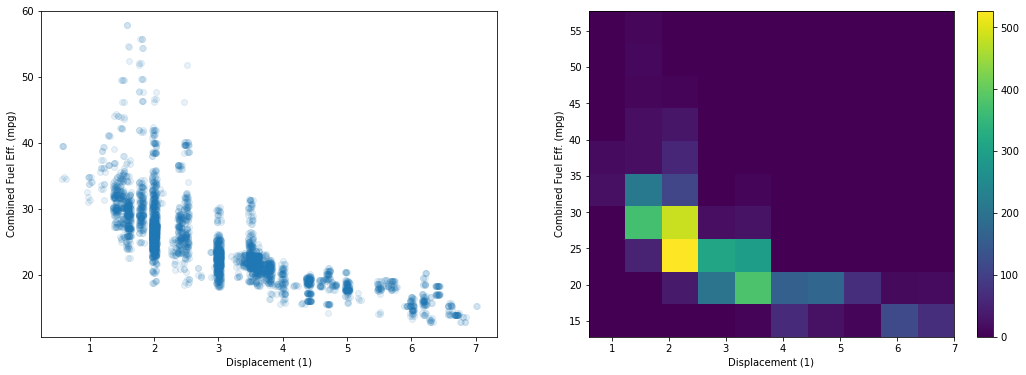

In [1]:
# TO DO: Necessary import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

# Read the CSV file
fuel_econ = pd.read_csv('fuel_econ.csv')
fuel_econ.head(10)


plt.figure(figsize=[18, 6])

# PLOT ON LEFT
plt.subplot(1, 2, 1)
sb.regplot(data=fuel_econ, x='displ', y='comb', x_jitter=0.04,
           scatter_kws={'alpha': 1/10}, fit_reg=False)
plt.xlabel('Displacement (1)')
plt.ylabel('Combined Fuel Eff. (mpg)');

# PLOT ON RIGHT
plt.subplot(1, 2, 2)
plt.hist2d(data=fuel_econ, x='displ', y='comb')
plt.colorbar()
plt.xlabel('Displacement (1)')
plt.ylabel('Combined Fuel Eff. (mpg)');

In the example above, we added a [`colorbar()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.colorbar.html) function call to add a colorbar to the side of the plot, showing the mapping from counts to colors.

**Additional Variations**

To select a different color palette, you can set the "cmap" parameter in `hist2d`. The most convenient way of doing this is to set the "cmap" value as a string referencing a built-in Matplotlib palette. A list of valid strings can be found on [this part](https://matplotlib.org/stable/api/pyplot_summary.html) of the Pyplot API documentation. A further discussion of color in plots will be left to the next lesson. For now, I will just show an example of reversing the default "viridis" color palette, by setting `cmap = 'viridis_r'`.

Furthermore, I would like to distinguish cells with zero counts from those with non-zero counts. The "cmin" parameter specifies the minimum value in a cell before it will be plotted. By adding a `cmin = 0.5` parameter to the `hist2d` call, this means that a cell will only get colored if it contains at least one point.

### Example 2. Heat plot - Set a minimum bound on counts and a reverse color map

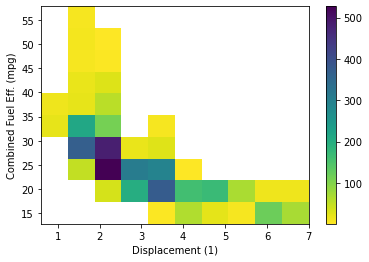

In [2]:
# Use cmin to set a minimum bound of counts
# Use cmap to reverse the color map.
plt.hist2d(data=fuel_econ, x='displ', y='comb', cmin=0.5, cmap='viridis_r')
plt.colorbar()
plt.xlabel('Displacement (1)')
plt.ylabel('Combined Fuel Eff. (mpg)');

As the count of points in the cell increases, the color in the heatmap gets brighter and moves from blue to yellow.

### Example 3. Heat plot - Specify bin edges

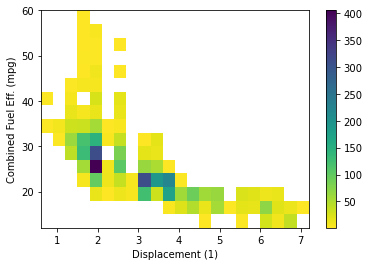

In [3]:
# Specify bin edges
bins_x = np.arange(0.6, 7+0.3, 0.3)
bins_y = np.arange(12, 58+3, 3)

plt.hist2d(data=fuel_econ, x='displ', y='comb', cmin=0.5,
           cmap='viridis_r', bins=[bins_x, bins_y])
plt.colorbar()
plt.xlabel('Displacement (1)')
plt.ylabel('Combined Fuel Eff. (mpg)');

# Notice the areas of high frequency in the middle of the negative trend in the plot.

Notice that since we have two variables, the "bins" parameter takes a list of two bin edge specifications, one for each dimension. Choosing an appropriate bin size is just as important here as it was for the univariate histogram.

**Annotations on each cell**

If you have a lot of data, you might want to add annotations to cells in the plot indicating the count of points in each cell. From `hist2d`, this requires the addition of text elements one by one, much like how text annotations were added one by one to the bar plots in the previous lesson. We can get the counts to annotate directly from what is returned by `hist2d`, which includes not just the plotting object, but an array of counts and two vectors of bin edges.

### Example 4. Add text annotation on each cell using pyplot.text() function

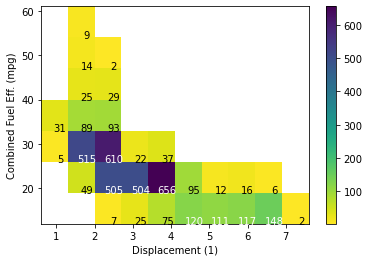

In [4]:
# Specify bin edges
bins_x = np.arange(0.6, 7+0.7, 0.7)
bins_y = np.arange(12, 58+7, 7)
# Use cmin to set a minimum bound of counts
# Use cmap to reverse the color map.
h2d = plt.hist2d(data=fuel_econ, x='displ', y='comb', cmin=0.5,
                 cmap='viridis_r', bins=[bins_x, bins_y])

plt.colorbar()
plt.xlabel('Displacement (1)')
plt.ylabel('Combined Fuel Eff. (mpg)');

# Select the bi-dimensional histogram, a 2D array of samples x and y.
# Values in x are histogrammed along the first dimension and
# values in y are histogrammed along the second dimension.
counts = h2d[0]

# Add text annotation on each cell
# Loop through the cell counts and add text annotations for each
for i in range(counts.shape[0]):
    for j in range(counts.shape[1]):
        c = counts[i, j]
        if c >= 100:  # increase visibility on darker cells
            plt.text(bins_x[i]+0.5, bins_y[j]+0.5, int(c),
                     ha='center', va='center', color='white')
        elif c > 0:
            plt.text(bins_x[i]+0.5, bins_y[j]+0.5, int(c),
                     ha='center', va='center', color='black')


If you have too many cells in your heat map, then the annotations will end up being too overwhelming, too much to attend to. In cases like that, it's best to leave off the annotations and let the data and colorbar speak for themselves.

You're more likely to see annotations in a categorical heat map, where there are going to be fewer cells plotted. Indeed, there is a parameter built into seaborn's `heatmap()` function that is built for categorical heatmaps, as will be seen later.